## <i>Import libraries</i>

In [0]:
from pandas import read_csv
from matplotlib import pyplot as plt

%tensorflow_version 2.x
from tensorflow.keras import Sequential, layers, optimizers

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Muat data

In [2]:
data = read_csv("https://pastebin.com/raw/jp0aG9tv", sep=";")
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


Kita pake <i>dataset</i> dari sini ya :<br>https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity<br>Sengaja saya taruh di pastebin biar enak aja waktu nge<i>load</i>'nya

## Bagi data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitive response'),
                                                   data['quantitive response'],
                                                   test_size=0.3)

Pada notebook ini saya ndak bahas <i>exploratory data analysis</i> yuy<br>Soalnya emang mau bahas cara bikin NN sederhana pake TensorFlow doang

## Inisialisasi model

### Jaringan saraf tiruan dari tensorflow

In [0]:
def Simple_NN():
  model = Sequential([
    layers.Dense(8, activation='relu', input_shape=[8]), # DELAPAN INI SOALNYA KOLOM DATA YANG DIPAKE NGETRAIN CUMA DELAPAN
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Terdiri dari :<br>8 node yang ada pada <i>input layer</i><br>8 node yang ada pada <i>hidden layer</i> 1 dan 2 beserta fungsi aktivasi yang digunakan yaitu ReLU<br>Terus 1 node pada <i>output layer</i> karena ini kita studi kasusnya regresi ya

In [5]:
lnr = LinearRegression()
mlp = MLPRegressor()
nn_tf = Simple_NN()

print(lnr, "\n")
print(mlp, "\n")
print(nn_tf.summary())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
________________________________________________

## Latih model-model

In [6]:
lnr.fit(x_train, y_train)

mlp.fit(x_train, y_train)

nn_tf.fit(x_train, y_train, epochs=200, validation_split = 0.2, verbose=1)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Epoch 1/200
10/10 [==============================] - 0s 19ms/step - loss: 110.2500 - mae: 9.0289 - mse: 112.7279 - val_loss: 71.6070 - val_mae: 7.4797 - val_mse: 68.8370
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 76.9015 - mae: 7.6794 - mse: 76.9071 - val_loss: 53.2868 - val_mae: 6.5859 - val_mse: 51.9257
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 57.1889 - mae: 6.7960 - mse: 57.3282 - val_loss: 41.2871 - val_mae: 5.8916 - val_mse: 40.7637
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 43.1013 - mae: 6.0651 - mse: 43.8725 - val_loss: 32.9871 - val_mae: 5.3224 - val_mse: 32.9597
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 34.3242 - mae: 5.4681 - mse: 34.7444 - val_loss: 27.1426 - val_mae: 4.8515 - val_mse: 27.4121
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 28.1461 - mae: 4.9604 - mse: 28.1462 - val_loss: 22.7814 - val_mae: 4.4383 - val_mse: 23.

## Uji & evaliasi model

In [7]:
hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)
hasil_nn_tf = nn_tf.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))
print("Mead Squared Error NN TensorFlow : " ,mean_squared_error(y_test, hasil_nn_tf))

Mead Squared Error Linear Regression :  1.3258339034013755
Mead Squared Error Multilayer Perceptron :  1.497416512190895
Mead Squared Error NN TensorFlow :  1.4001494960827985


Semakin kecil MSE sebuah model maka semakin bagus model tersebut dalam memprediksi

## Grafik garis

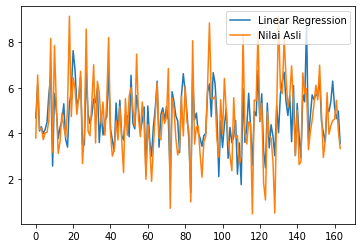

In [8]:
plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")

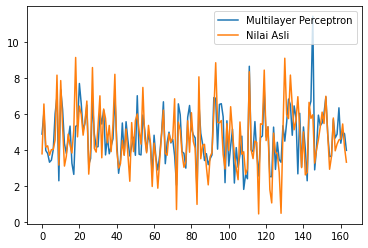

In [9]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")

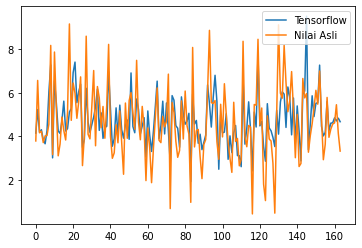

In [10]:
plt.plot(list(hasil_nn_tf), label='Tensorflow')
plt.plot(list(y_test), label='Nilai Asli')

plt.legend(loc="upper right")